#  Redukcija dimenzija

**"The process of reducing the number of random variables under consideration by obtaining a set of principal variables"**

## Pregled
* Feature selection vs Feature reduction
* PCA
* Autoenkoderi
* t-SNE
* Prateći kodovi

## Redukcija dimenzija
* Predavanje u potpunosti prati prezentaciju ["Kako videti n dimenzija?"](http://csnedelja.mg.edu.rs/static/resources/v4.0/uto2_ndimenzija_nj.pdf)
* Kako bi se izbeglo prepisivanje cele prezentacije u ovaj notebook, ovde su dodati samo relevantni prateći kodovi
* Ovo uključuje:
  * Korišćenje tSNE, PCA i Isomap algoritama iz biblioteke sklearn i njihovu primenu na "swiss roll"
  * Implementaciju autoenkodera u tensorflow i primenu na "swiss roll"
  * Primenu PCA i tSNE na vizualizaciju MNIST dataseta

## Vizualizacija "swiss roll" - tSNE, PCA, Isomap

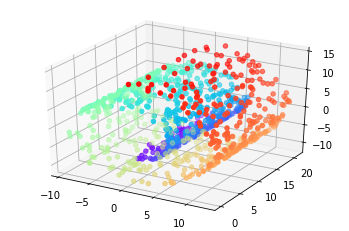

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# sklearn nudi funkciju za generisanje swiss roll dataseta
p, uni = make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)
p = np.asarray([pt for _, pt in sorted(zip(uni, p))])

# Plotujemo sam dataset
fig = plt.figure()
ax = fig.gca(projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(p[:,0])))
ax.scatter(p[:, 0], p[:, 1], p[:, 2], color=colors)
fig.show()


PCA:


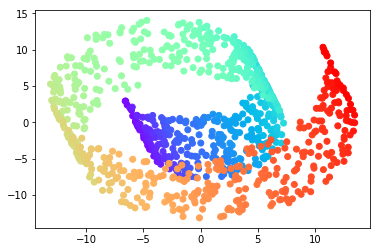

Isomap:


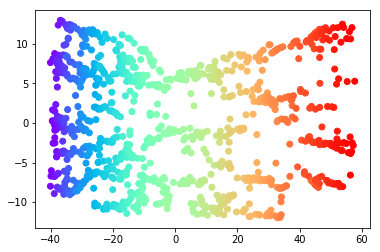

tSNE:


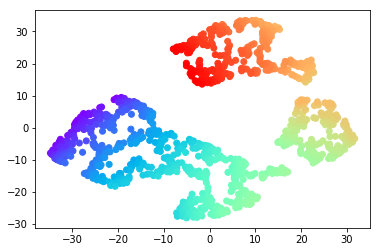

In [35]:
# Redukcija na dve dimenzije koriscenjem PCA
pca = PCA(n_components=2)
p_new = pca.fit_transform(p)
print('PCA:')
plt.scatter(p_new[:, 0], p_new[:, 1], color=colors)
plt.show()

# Redukcija na dve dimenzije koriscenjem Isomap
p_iso = Isomap(n_components=2).fit_transform(p)
print('Isomap:')
plt.scatter(p_iso[:, 0], p_iso[:, 1], color=colors)
plt.show()

# Redukcija na dve dimenzije koriscenjem tSNE
# Pokusati sa vise od 500 iteracija za bolje rezultate
# (ali sporiju konvergenciju)
p_tsne = TSNE(n_components=2, perplexity=34, n_iter=500).fit_transform(p)
print('tSNE:')
plt.scatter(p_tsne[:, 0], p_tsne[:, 1], color=colors)
plt.show()

## Vizualizacija "swiss roll" - autoenkoder

[[-0.48438199  0.77301071 -1.08058709]
 [-0.47506508  0.04464723 -1.0823373 ]
 [-0.47480957  1.91779414 -1.08238307]
 ...
 [-0.44795832  1.77017369  1.26096982]
 [-0.46246959  0.5645168   1.26231195]
 [-0.46306417 -0.20573922  1.26236435]]
Epoch: 0 | Loss: 0.5368047015881166
Epoch: 1 | Loss: 0.3790535650039092
Epoch: 2 | Loss: 0.3324302901573246
Epoch: 3 | Loss: 0.32259074977959973
Epoch: 4 | Loss: 0.3197324457578361
Epoch: 5 | Loss: 0.31578480573208073
Epoch: 6 | Loss: 0.3094832399484585
Epoch: 7 | Loss: 0.2946400665313122
Epoch: 8 | Loss: 0.2716133550864179
Epoch: 9 | Loss: 0.26155632359476294
Epoch: 10 | Loss: 0.2584704551973846
Epoch: 11 | Loss: 0.2576560896013398
Epoch: 12 | Loss: 0.25688840698706916
Epoch: 13 | Loss: 0.2560382922778372
Epoch: 14 | Loss: 0.25528927000518886
Epoch: 15 | Loss: 0.254674857996637
Epoch: 16 | Loss: 0.25417646059440446
Epoch: 17 | Loss: 0.25377133482671344
Epoch: 18 | Loss: 0.25343968982301884
Epoch: 19 | Loss: 0.2531659116127703


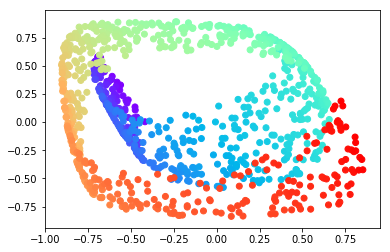

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import sklearn.datasets
import tensorflow as tf
from matplotlib import cm

# Generisemo swiss roll dataset
p, uni = sk.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)
p = np.asarray([pt for _, pt in sorted(zip(uni, p))])

# Normalizacija podataka
data = (p - np.mean(p)) / np.std(p)
print(data)

# Dimenzije: 3 -> 2
n = 3
d = 2

# Parametri
num_examples = 1000
num_epochs = 20

# Ulazni podaci
X = tf.placeholder(tf.float32, [None, n])

# Enkodiranje
Wh = tf.Variable(tf.random_uniform([n, d]))
bh = tf.Variable(tf.zeros([d]))
z = tf.nn.tanh(tf.add(tf.matmul(X, Wh), bh))

# Dekodiranje
Wo = tf.Variable(tf.random_uniform([d, n]))
bo = tf.Variable(tf.zeros([n]))
hyp = tf.nn.tanh(tf.add(tf.matmul(z, Wo), bo))

# Funkcija troska (rekonstrukcija)
cost = tf.reduce_mean(tf.square(hyp - X))
opt_op = tf.train.AdamOptimizer().minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Trening
    for epoch in range(num_epochs):
        epoch_loss = 0
        for idx in range(num_examples):
            curr = np.reshape(data[idx], [1, 3])
            loss, _ = sess.run([cost, opt_op], feed_dict={X: curr})
            epoch_loss += loss 
        epoch_loss /= num_examples
        print('Epoch: {} | Loss: {}'.format(epoch, epoch_loss))
    
    # Transform and plot
    data_transformed = sess.run(z, feed_dict={X: data})
    colors = cm.rainbow(np.linspace(0, 1, len(p[:,0])))
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], color=colors)
    plt.show()

## Vizualizacija MNIST-a - PCA i tSNE

PCA:
Objasnjeno varijanse (po dimenzijama): [0.09704709 0.07095962]


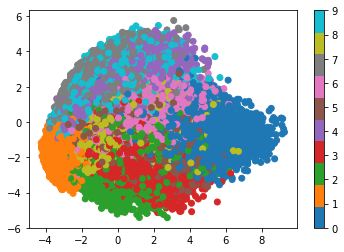

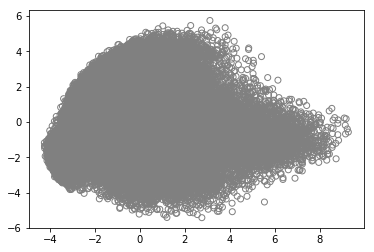

tSNE:


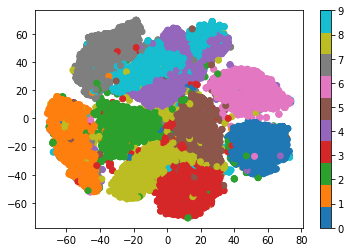

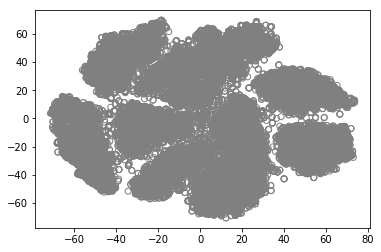

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Ucitavanje mnist skupa podataka
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_train = X_train.reshape((-1, 784))

# PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_train)
print('PCA:')
print('Objasnjeno varijanse (po dimenzijama): {}'.format(pca.explained_variance_ratio_))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_train, cmap=cm.tab10)
plt.colorbar()
plt.show()
plt.scatter(X_projected[:, 0], X_projected[:, 1], facecolors='none', edgecolors='grey')
plt.show()

# tSNE

# Previse spor kada se pokrene na svim podacima pa koristimo prvih 25000
# I na prvih 25000 ovo traje 20+ minuta
X_train = X_train[:25000, :]
y_train = y_train[:25000]

X_tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(X_train)
print('tSNE:')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=cm.tab10)
plt.colorbar()
plt.show()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], facecolors='none', edgecolors='grey')
plt.show()
